In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('chip_data.csv')

In [3]:
df.head()

,test_A,test_B,label
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


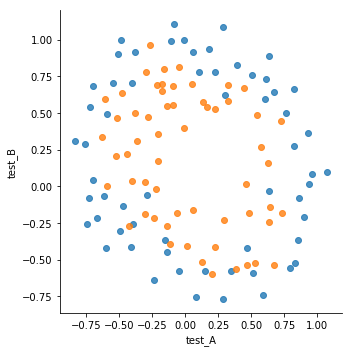

In [4]:
import seaborn as sns 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="test_A", y="test_B", data=df, fit_reg=False,hue = 'label' ,legend=False)
plt.show()

In [5]:
#Training and labels
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [6]:
X.insert(loc = 0,column = 'bias',value=np.ones(X.shape[0]))

In [7]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [8]:
w = np.random.normal(0,1,X.shape[1])

In [9]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [10]:
def loss(y,hx):
    return ((-y * np.log(hx)) - (1-y) * np.log(1-hx)).mean()

In [11]:
def newton(w,epochs):
    weights = []
    errors = []
    w = w.reshape(-1,1)
    for i in range(epochs):
        pred = np.dot(X_train,w)
        print(pred.shape)
        h = sigmoid(pred)
        #h = h.reshape(-1,1)
        a = h*(1-h)*X_train
        error = loss(Y_train.values.reshape(-1,1),h)
        print(error)
        grad = np.dot(X_train.T,h- Y_train.values.reshape(-1,1))
        hess = a.T @ X_train
        weights.append(w)
        errors.append(error)
        w = w - np.matmul(np.linalg.pinv(hess),grad);
    return weights,errors

In [12]:
theta,cost = newton(w,10)

(82, 1)
0.7268583014499496
(82, 1)
0.6857473922428547
(82, 1)
0.6853446339853462
(82, 1)
0.6853446287882287
(82, 1)
0.6853446287882287
(82, 1)
0.6853446287882287
(82, 1)
0.6853446287882287
(82, 1)
0.6853446287882288
(82, 1)
0.6853446287882287
(82, 1)
0.6853446287882288


In [13]:
print(cost)

[0.7268583014499496, 0.6857473922428547, 0.6853446339853462, 0.6853446287882287, 0.6853446287882287, 0.6853446287882287, 0.6853446287882287, 0.6853446287882288, 0.6853446287882287, 0.6853446287882288]


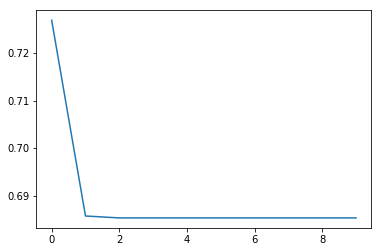

In [14]:
plt.plot(cost)

In [15]:
theta = theta[-1]
theta

array([[-0.26435722],
       [ 0.08991935],
       [ 0.06802284]])

In [16]:
theta.reshape(-1,)

array([-0.26435722,  0.08991935,  0.06802284])

Text(0,0.5,'value of cost')

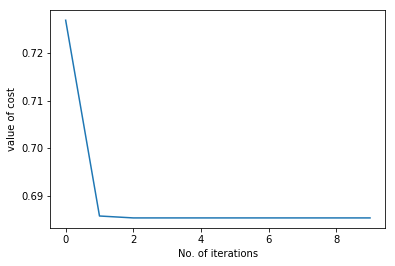

In [17]:
plt.plot(cost)
plt.xlabel("No. of iterations")
plt.ylabel("value of cost")

In [18]:
def pred(data):
    return sigmoid(np.dot(data,theta))

In [19]:
a = pred(X_test)

In [20]:
a = a.reshape(-1,)

In [21]:
a = a >= 0.5

In [22]:
pred = pd.DataFrame(data = {"label":a}).astype(int)

In [23]:
a.shape

(36,)

In [24]:
Y_test = Y_test.reset_index(drop=True)

In [25]:
predicted_data = pd.concat([pred,pd.DataFrame({"Actual_label":Y_test})],axis = 1)

In [26]:
predicted_data.head()

,label,Actual_label
0,0,1
1,0,0
2,0,0
3,0,0
4,0,1


In [27]:
accuracy = 1 - np.sum(abs(predicted_data['label'] - predicted_data['Actual_label']))/predicted_data.shape[0]

In [28]:
print("Accuracy of the model without any parameter tunning is :",accuracy)

Accuracy of the model without any parameter tunning is : 0.38888888888888884


In [29]:
plot_data = pd.concat([X,Y],axis=1)

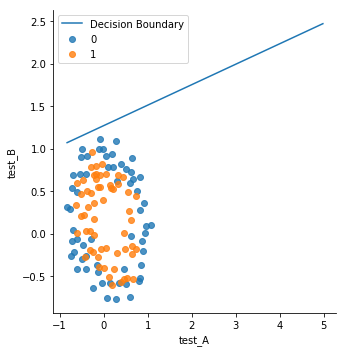

In [30]:
import seaborn as sns 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="test_A", y="test_B", data=plot_data, fit_reg=False,hue = 'label' ,legend=False)
x_0 = min(plot_data['test_A'])
x_1 = max(plot_data['test_A'])

plt.plot([x_0,1 * -(theta[0] + theta[1]* x_0)/theta[2]], [ x_1,1 * -(theta[0] + theta[1]* x_1)/theta[2] ],label = "Decision Boundary")
# Move the legend to an empty part of the plot
plt.legend(loc='best')